In [34]:
import warnings 
warnings.filterwarnings('ignore')
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# importing ploting libraries
import matplotlib.pyplot as plt   
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [35]:
veh_df = pd.read_csv("vehicle.csv")

In [36]:
veh_df.shape

(846, 19)

In [37]:
veh_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [38]:
veh_df['class'] = pd.Categorical(veh_df['class']).codes # convert çlass categorical to numerical

In [39]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [40]:
veh_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

In [41]:
# This is not used/called as we are not 'treating outliers" but removing them.

def replace(x):
    median, std = x.median(), x.std()  #Get the median and the standard deviation of every column
    outliers = (x - median).abs() > 2*std # Subtract median from every member of each column. Take absolute values > 2std
    x[outliers] = x.median()       
    return x

#veh_df = veh_df.apply(lambda x:x.transform(replace)) # transforming raw data using replace function

In [42]:
veh_df.info() # all  NaN values are treated appropriately

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [43]:
# outliers removal

In [44]:
veh_df['Outlier'] = False # add a temp column to mark outliers for deletion. will be deleted later

In [45]:
# define a function which marks the outliers for any column as "True" in aq_df , 
# and returns the count of outliers rows for the column
def mark_outlier_row_from_Column(df,column_name):
    count = 0
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    for i in range(0,len(df)):
        if df[column_name][i] < lower_bound:            
            df['Outlier'][i] = True
            count = count +1
        if df[column_name][i] > upper_bound:            
            count = count +1
            df['Outlier'][i] = True
    return(column_name, count)

In [46]:
for j in range(len(veh_df.columns) - 1): # excluding outlier column
    print(mark_outlier_row_from_Column(veh_df,veh_df.columns[j]))

('compactness', 0)
('circularity', 0)
('distance_circularity', 0)
('radius_ratio', 3)
('pr.axis_aspect_ratio', 8)
('max.length_aspect_ratio', 13)
('scatter_ratio', 0)
('elongatedness', 0)
('pr.axis_rectangularity', 0)
('max.length_rectangularity', 0)
('scaled_variance', 1)
('scaled_variance.1', 2)
('scaled_radius_of_gyration', 0)
('scaled_radius_of_gyration.1', 15)
('skewness_about', 12)
('skewness_about.1', 1)
('skewness_about.2', 0)
('hollows_ratio', 0)
('class', 0)


In [47]:
len(veh_df[veh_df['Outlier'] == True])
#len = 33  #  outliers in all have to be removed

33

In [48]:
# delete the rows with outlier = True

veh_df.drop(veh_df[veh_df['Outlier'] == True].index,  inplace=True)
#df.drop(df[df.score < 50].index, inplace=True)

In [49]:
veh_df.shape

(813, 20)

In [50]:
veh_df.drop('Outlier', inplace=True,axis = 1 )

In [51]:
# finding missing values . 33 identified. Write code to replace each missing value/ nan with 
# the mean values of the class type for the column in which NaN is found.
for i in range(len(veh_df.index)) :
    if(veh_df.iloc[i].isnull().sum() > 0 ):
        
        class_v = int(veh_df.iloc[i]["class"]) # class of the row in which NaNs is found
        for j in range(len(veh_df.columns)):
            if(np.isnan(veh_df.iloc[i,j])):# get the cell in which nan exists
                col_name = veh_df.columns[j] # find its col label
                new_value = veh_df.groupby('class')[col_name].mean()[class_v] # find mean of the coln. for the particular class
                veh_df.iloc[i,j] = new_value # replace  nan with the eman value
                


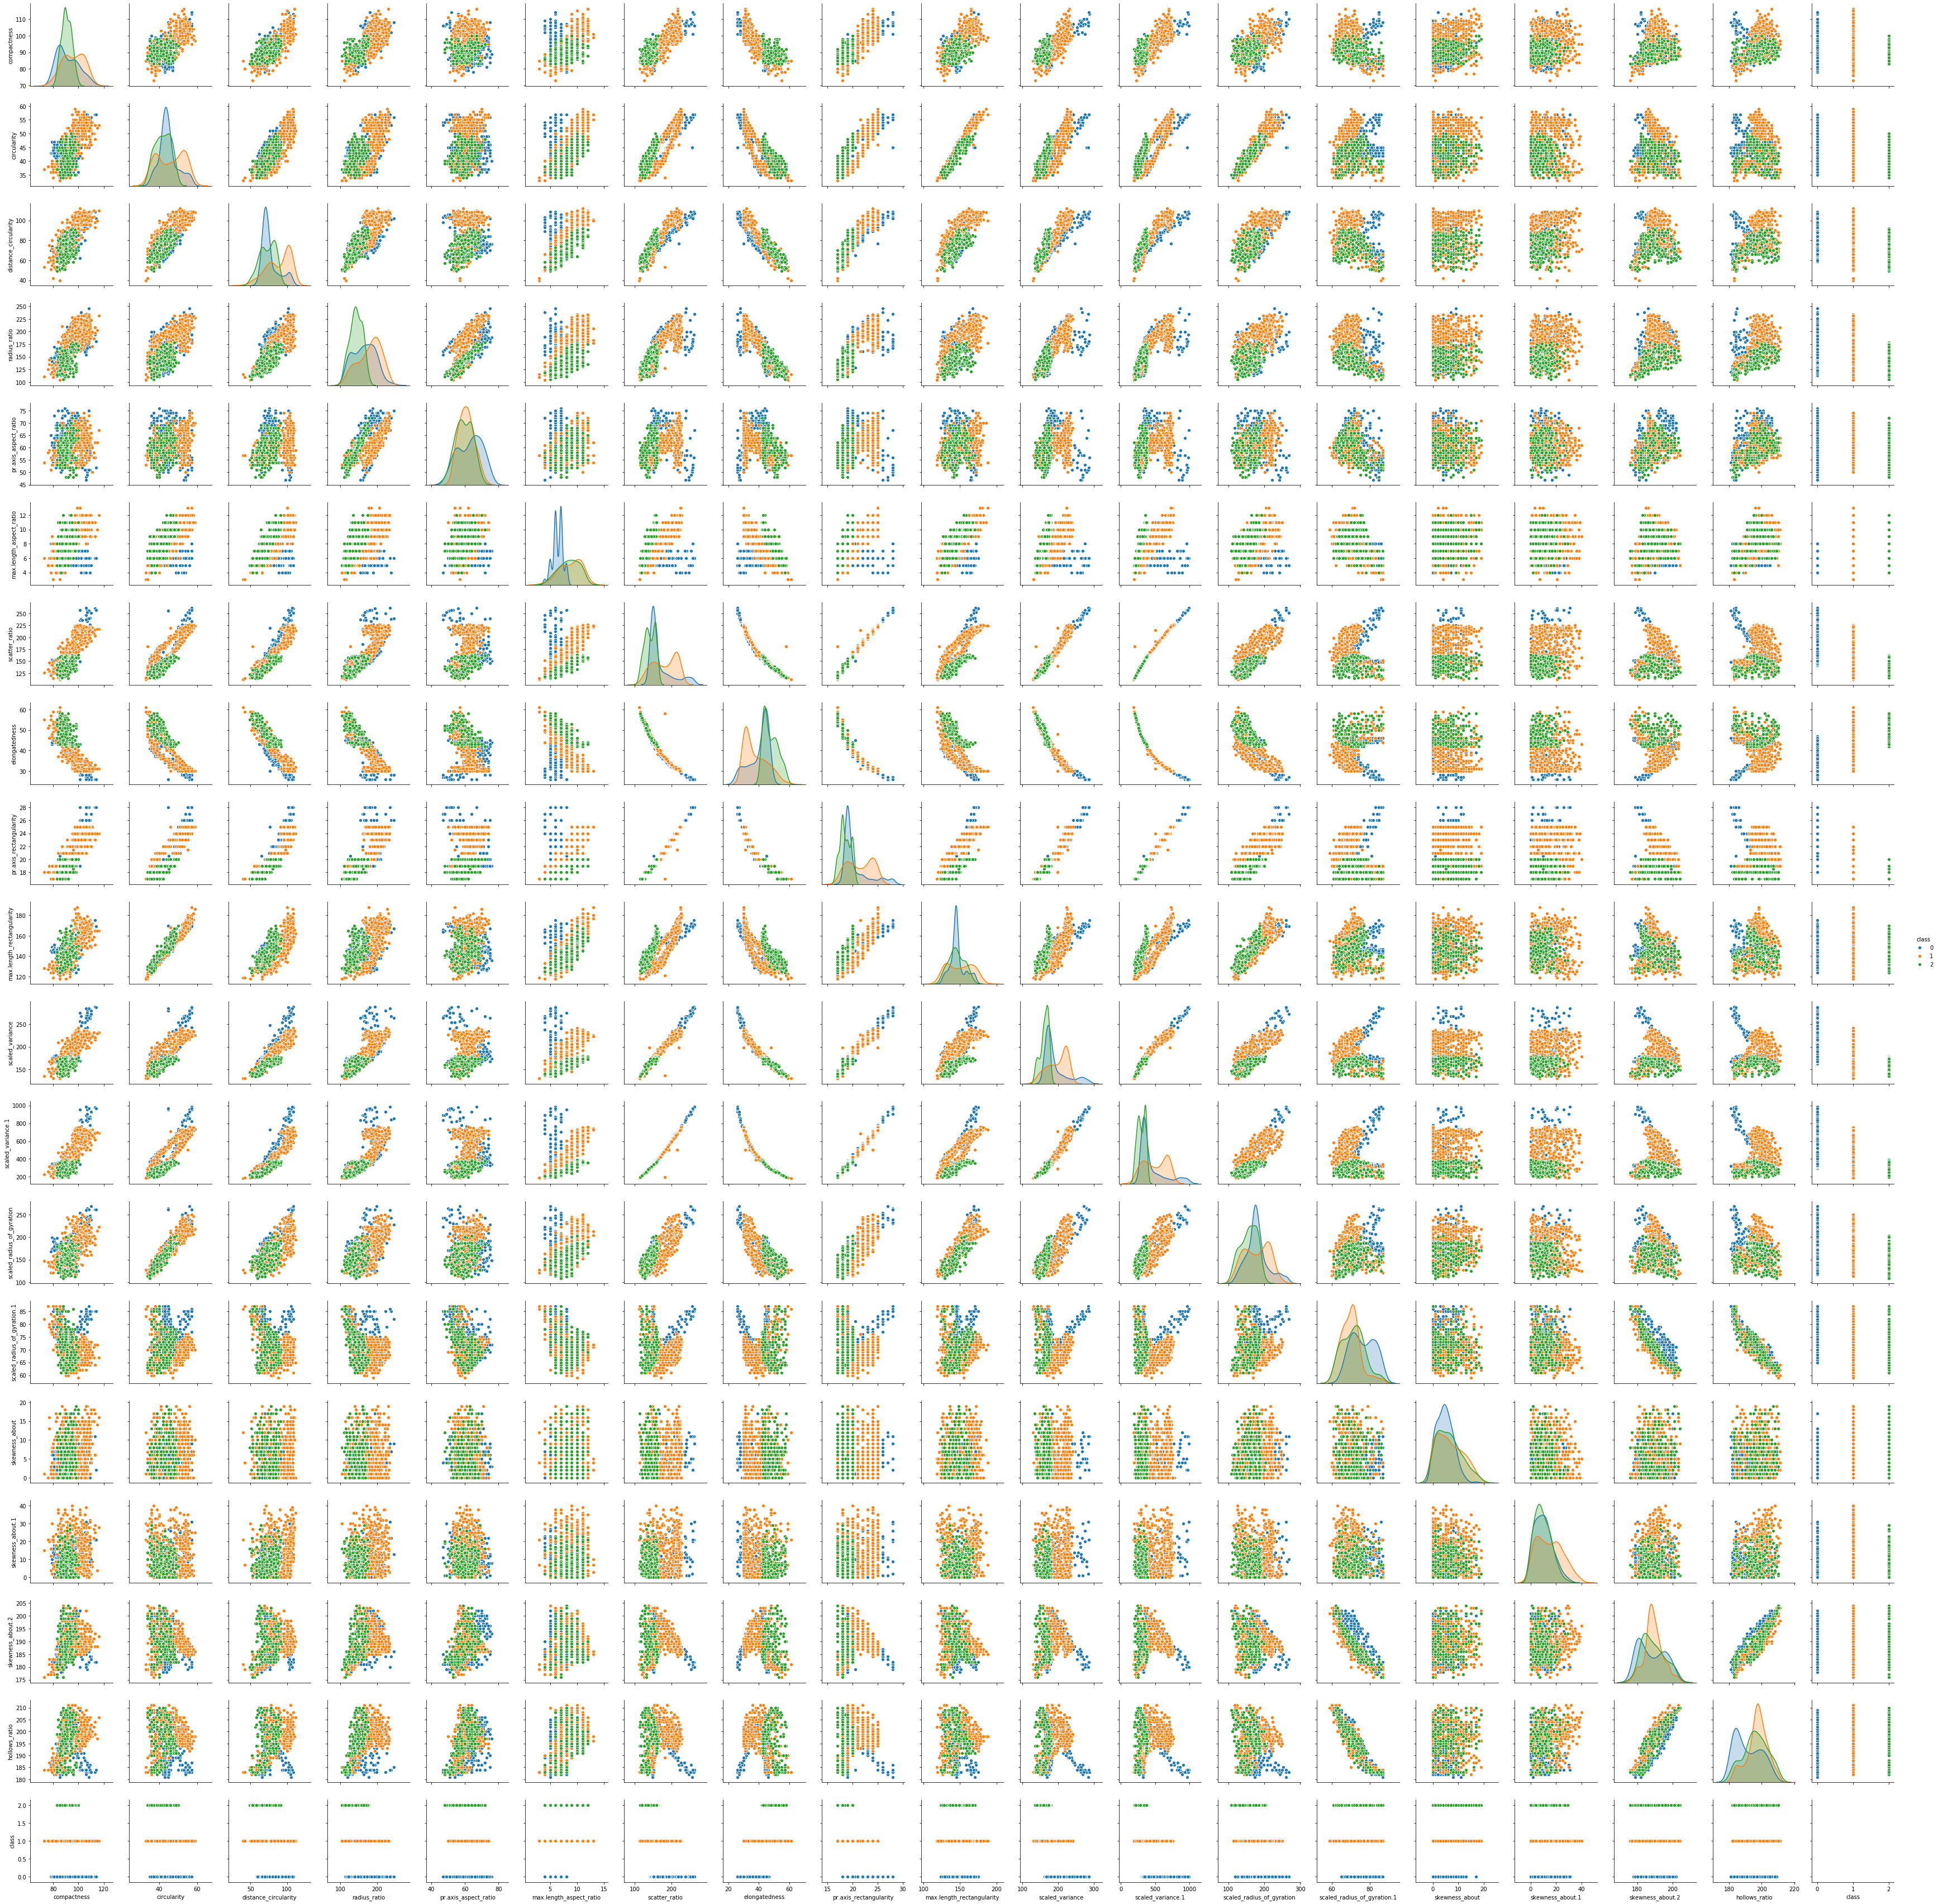

In [52]:
sns.pairplot(veh_df, hue ='class' , diag_kind = 'kde')

In [53]:
#  We do not include target variables in the analysis on PCA. Hence class col will be removed
# attributes which can  be left out - skewness_about, Skewness_about_1, maxlength_aspect_ratio  seems to not be correlated to any other attribute
# rest of the attributes have a positive or negative corelatioon ratio with alteast  some attributes so we will include them in  PCA if not all.

In [54]:
# Split the vehic le data into separate training (70%) and test (30%) sets and then standardize it to unit variance:


X = veh_df[veh_df.columns[1:-1]]
y = veh_df["class"]

In [55]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
train_cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00123153e+00  7.88085275e-01  6.42136667e-01  2.05907185e-01
   5.64605769e-01  8.44586883e-01 -8.17048538e-01  8.43617090e-01
   9.63379824e-01  8.02997541e-01  8.37662890e-01  9.27594590e-01
   6.86013653e-02  1.40928485e-01 -1.47384523e-02 -1.18490816e-01
   3.81855918e-02]
 [ 7.88085275e-01  1.00123153e+00  8.09677039e-01  2.45659089e-01
   6.69614329e-01  9.04741982e-01 -9.09746985e-01  8.95769456e-01
   7.69125238e-01  8.84827297e-01  8.91266653e-01  7.02280126e-01
  -2.39271816e-01  9.83373572e-02  2.65147948e-01  1.29449454e-01
   3.22882887e-01]
 [ 6.42136667e-01  8.09677039e-01  1.00123153e+00  6.67344108e-01
   4.60477832e-01  7.89639417e-01 -8.45448772e-01  7.64620766e-01
   5.77678904e-01  7.94359686e-01  7.80093544e-01  5.50582765e-01
  -4.05337471e-01  4.24539863e-02  1.89134341e-01  4.19595016e-01
   5.05723819e-01]
 [ 2.05907185e-01  2.45659089e-01  6.67344108e-01  1.00123153e+00
   1.37955139e-01  1.99922122e-01 -3.02769571e-01  1.68748609e-

In [56]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.29916792 -0.12201704  0.21499632  0.00719245  0.1190422   0.0568512
   0.39380247 -0.01294292  0.23737527  0.0765179   0.16725005 -0.02372183
   0.10644985 -0.47686325  0.44837728  0.35445707 -0.14329971]
 [-0.312589    0.05709825 -0.07268294  0.12397274  0.05698367 -0.01240858
  -0.22189598 -0.37908205 -0.08982854  0.77169052 -0.21384796 -0.00937193
  -0.02426843  0.06795467  0.11339609  0.01066112  0.12025136]
 [-0.28101087  0.21742844 -0.02918526 -0.24505667 -0.12718806  0.12520727
  -0.16062641 -0.11908593  0.15109667 -0.14304586  0.26673352  0.02323087
  -0.01487712  0.32194732 -0.19528906  0.64872536  0.2513656 ]
 [-0.10311063  0.26922801  0.14020275 -0.58191053 -0.09885133  0.62642831
  -0.05001472  0.05691572  0.02264005  0.05327329 -0.14079929 -0.01105751
   0.00275734 -0.1311969   0.06769825 -0.32114587 -0.04947368]
 [-0.20198736  0.10375512  0.13388574  0.38102344  0.57026461  0.32138488
  -0.37413676  0.17832498 -0.25227878 -0.21178981  0.17287474  0.

In [57]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort() # defult on first column and least on top. Hence reverse

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(9.093784820946826, array([-0.29916792, -0.312589  , -0.28101087, -0.10311063, -0.20198736,
       -0.32224113,  0.32062048, -0.31950922, -0.28889906, -0.31451509,
       -0.31943651, -0.27565925,  0.03830011, -0.03443506, -0.06076079,
       -0.02692772, -0.07865192])), (3.3528918592383317, array([-0.12201704,  0.05709825,  0.21742844,  0.26922801,  0.10375512,
       -0.0608484 , -0.00111607, -0.0742428 , -0.11484459, -0.05862025,
       -0.06623952, -0.19914594, -0.50753827,  0.01244751,  0.09625401,
        0.50287695,  0.51140923])), (1.2083184061533316, array([ 0.21499632, -0.07268294, -0.02918526,  0.14020275,  0.13388574,
       -0.11245757,  0.08702946, -0.11109603,  0.22077629, -0.14306563,
       -0.1133423 ,  0.21857174, -0.06503448,  0.49869104, -0.69954803,
        0.06198791,  0.03917166])), (1.121685040279568, array([ 0.00719245,  0.12397274, -0.24505667, -0.58191053,  0.38102344,
       -0.01205838,  0.07790709,  0.01241116,  0.0989725 , -0.07853758,
       -0.0231069

In [58]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 7 entries as there are 7 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 7 entries with 7 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.53427055, 0.73125689, 0.80224702, 0.86814733, 0.91989375,
       0.95639084, 0.97503134, 0.98286934, 0.98745973, 0.99110511,
       0.99361963, 0.99559467, 0.99720258, 0.99834972, 0.99929643,
       0.99979826, 1.        ])

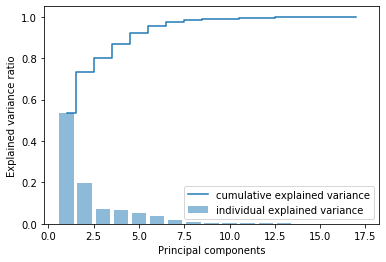

In [59]:
plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [60]:
X_std.shape

(813, 17)

In [61]:
#X_train_std.shape

In [62]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:9])   # Reducing from 17 to 9 dimension space

X_std_9D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_9D)  # converting array to dataframe for pairplot

In [63]:
Proj_data_df.shape

(813, 9)

In [64]:
y.shape

(813,)

In [65]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

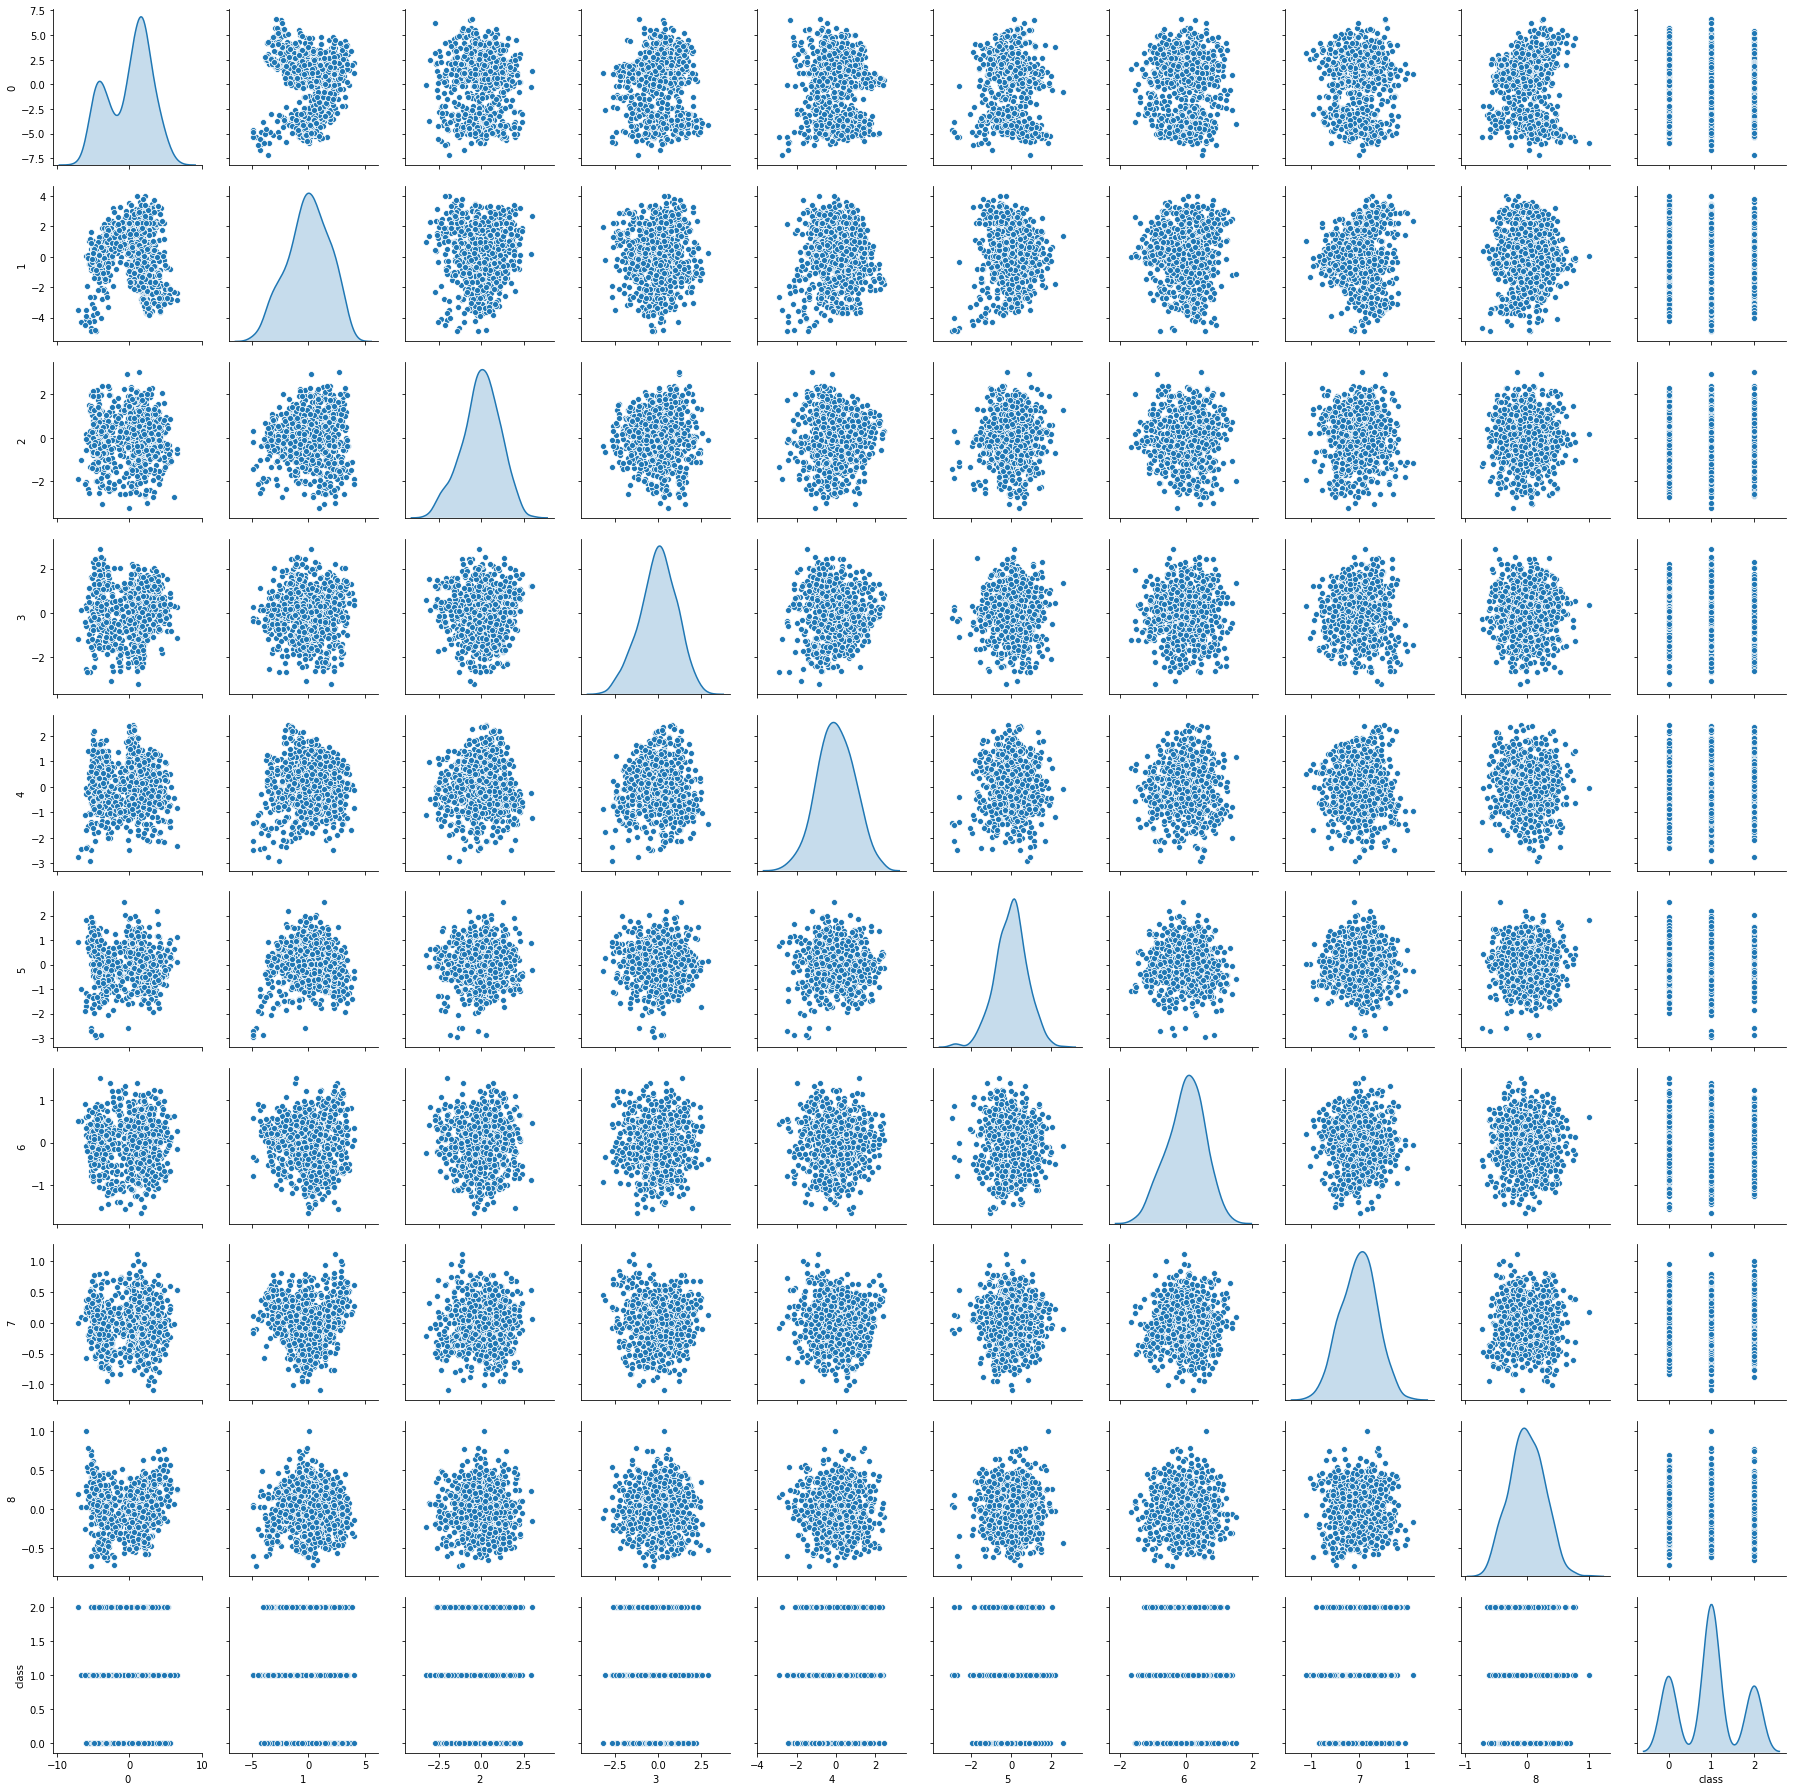

In [66]:
#Let us check it visually, we can see that the dimesnions obtained by PCA are independent
Proj_data_veh_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_veh_df, diag_kind='kde') 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(Proj_data_df, y, test_size = 0.30)  


In [79]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', C= 1)  
svclassifier.fit(X_train, y_train)  

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
y_pred = svclassifier.predict(X_test)  

In [81]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[ 61   3   2]
 [  7 111   4]
 [  0   4  52]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        66
           1       0.94      0.91      0.93       122
           2       0.90      0.93      0.91        56

    accuracy                           0.92       244
   macro avg       0.91      0.92      0.92       244
weighted avg       0.92      0.92      0.92       244



In [77]:
# linear kernel with C= 1 has accuarcy 0.92
# C = 0.5 has accuracy 0.92
# C = 0.05 has accuracy 0.90
# C= 0.01 has accuracy 0.91

# Thus max accuracy is with C= 0.5


In [82]:
## Let us try RBF kernel

In [83]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [84]:
y_pred = svclassifier.predict(X_test)  

In [85]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[ 65   1   0]
 [  0 121   1]
 [  1   2  53]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       0.98      0.99      0.98       122
           2       0.98      0.95      0.96        56

    accuracy                           0.98       244
   macro avg       0.98      0.97      0.98       244
weighted avg       0.98      0.98      0.98       244



In [86]:
# rbf performs better than linear. Let us try rbf for different values of C to find optimal
# try C values - 0.01, 0.05, 0.5, 1

In [95]:
svclassifier = SVC(kernel='rbf', C= 0.5)  
svclassifier.fit(X_train, y_train) 

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [96]:
y_pred = svclassifier.predict(X_test)  

In [97]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[ 65   1   0]
 [  0 120   2]
 [  0   1  55]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.98      0.98      0.98       122
           2       0.96      0.98      0.97        56

    accuracy                           0.98       244
   macro avg       0.98      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244



In [98]:
# C= 1, overall accuracy is 0.98:
# C= 0.5 overall accouracy is 0.98
# C= 0.05 overal accuracy is 0.70
# C = 0.01 Overall accuracy is 0.50

# hence best results are given by 0.5 with rbf kernel